# AI & DL

## Лабораторная работа №5

### Выполнил: Инютин М. А.
### Группа: М8О-407Б-19

## Установка

In [1]:
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils

display = utils.notebook_init()  # checks

YOLOv5 🚀 2023-5-5 Python-3.10.6 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)


Setup complete ✅ (16 CPUs, 31.3 GB RAM, 139.0/915.3 GB disk)


## Работа с данными

In [2]:
import os
import random

import cv2
import pandas as pd

In [3]:
def go_to_data():
    %cd "../../data"
    return


def go_to_dataset():
    %cd "../../data/tensorflow-great-barrier-reef"
    return


def go_to_yolov5():
    %cd "../../lab5/yolov5"
    return

### Распаковываю архив

In [4]:
go_to_data()

!rm -rf "tensorflow-great-barrier-reef"
!mkdir "tensorflow-great-barrier-reef"
%cd "tensorflow-great-barrier-reef"
!unzip -q "../tensorflow-great-barrier-reef.zip"
!mv "train_images/video_0" "../../data/tensorflow-great-barrier-reef/images"
!rm -rf "train_images"
!mkdir "labels"

f = pd.read_csv("train.csv")

go_to_yolov5()

/home/engineerxl-desktop/Study/artificial-intelligence/aidl/data
/home/engineerxl-desktop/Study/artificial-intelligence/aidl/data/tensorflow-great-barrier-reef
/home/engineerxl-desktop/Study/artificial-intelligence/aidl/lab5/yolov5


### Создаю labels в формате .txt

In [5]:
PATH_TO_DS = "../../data/tensorflow-great-barrier-reef/"

fnames = []

for _, row in f[f["video_id"] == 0].iterrows():
    annotations = row["annotations"]
    fname = row["image_id"][2:]
    img_path = PATH_TO_DS + "images/" + fname + ".jpg"
    if not (os.path.isfile(img_path)):
        continue
    if annotations == "[]":
        os.remove(img_path)
        continue
    boxes = eval(annotations)
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    lbl_path = PATH_TO_DS + "labels/" + fname + ".txt"
    fnames.append(fname)
    with open(lbl_path, "w") as lbl:
        for el in boxes:
            xc = el["x"] + el["width"] / 2
            yc = el["y"] + el["height"] / 2
            lbl.write(
                "0 %.6lf %.6lf %.6lf %.6lf\n"
                % (xc / w, yc / h, el["width"] / w, el["height"] / h)
            )

### Разделяю на train и val

In [6]:
n = len(fnames)

n_train = int(0.8 * n)

go_to_dataset()

!mkdir "./images/train" "./images/val"
!mkdir "./labels/train" "./labels/val"

random.shuffle(fnames)
for el in fnames[:n_train]:
    os.rename("./images/" + el + ".jpg", "./images/train/" + el + ".jpg")
    os.rename("./labels/" + el + ".txt", "./labels/train/" + el + ".txt")

for el in fnames[n_train:]:
    os.rename("./images/" + el + ".jpg", "./images/val/" + el + ".jpg")
    os.rename("./labels/" + el + ".txt", "./labels/val/" + el + ".txt")

go_to_yolov5()

/home/engineerxl-desktop/Study/artificial-intelligence/aidl/data/tensorflow-great-barrier-reef
/home/engineerxl-desktop/Study/artificial-intelligence/aidl/lab5/yolov5


## Обучение

In [7]:
!python3 train.py --img 640 --batch 16 --epochs 50 --data ../dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /home/engineerxl-desktop/Study/artificial-intelligence/aidl/lab5/requirements.txt not found, check failed.
YOLOv5 🚀 2023-5-5 Python-3.10.6 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.

## Результаты

In [8]:
from utils.plots import plot_results

In [9]:
plot_results("./runs/train/exp/results.csv")

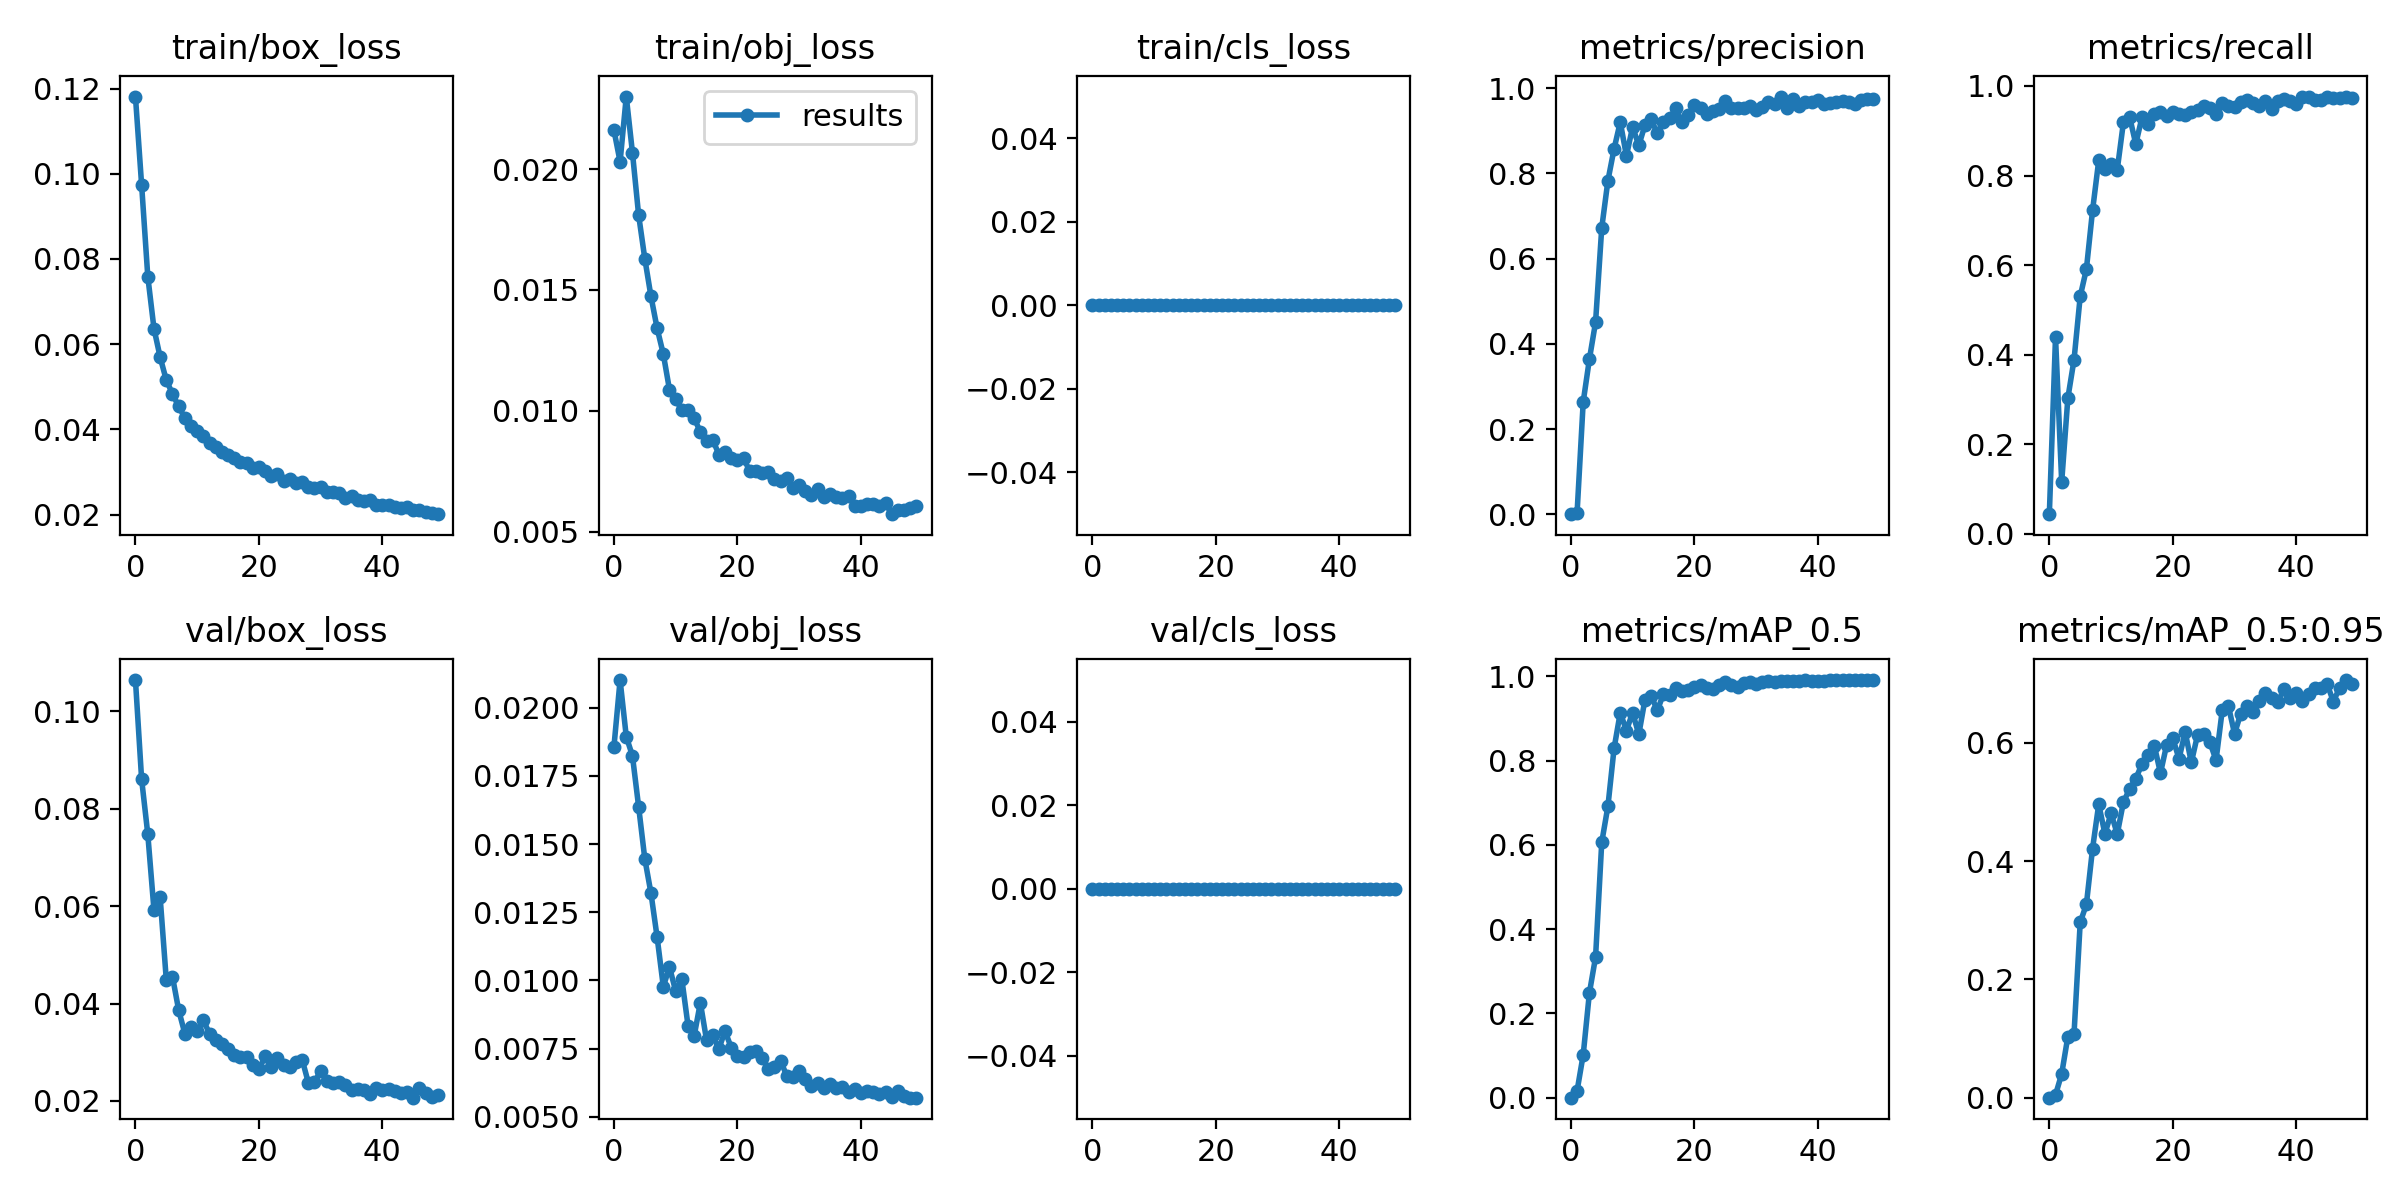

In [10]:
display.Image("./runs/train/exp/results.png", width=1080)

## Confusion matrix

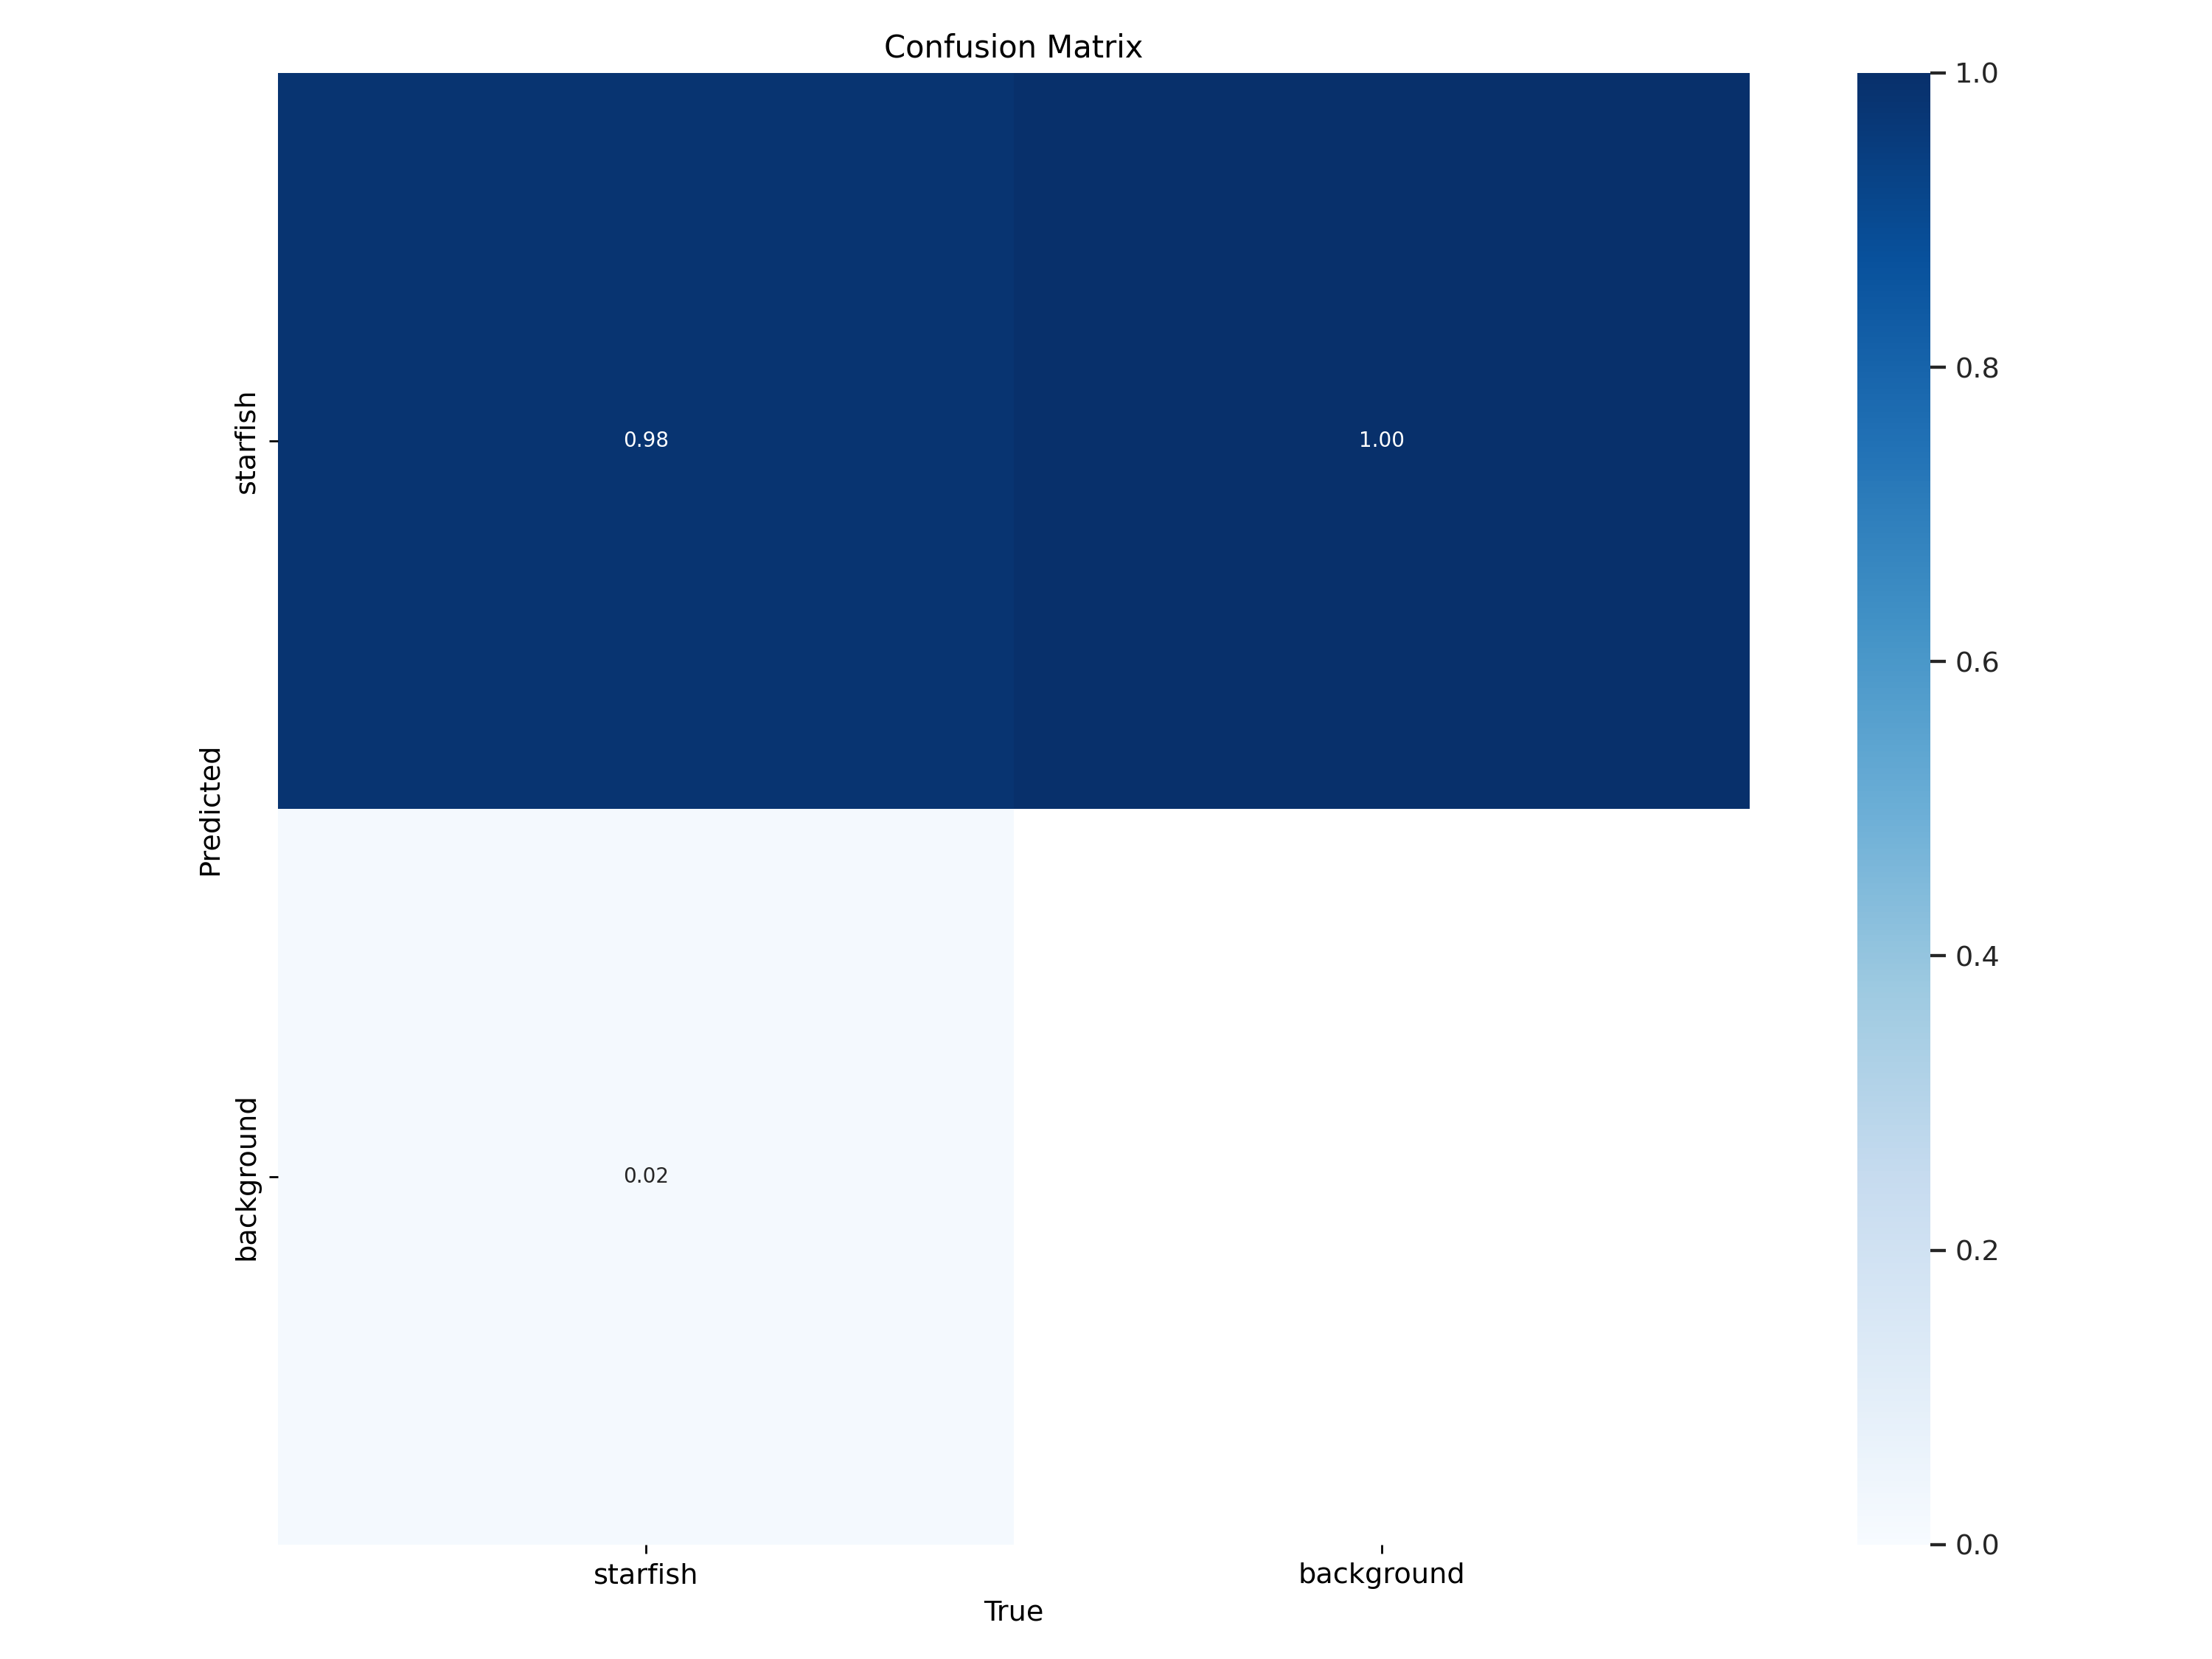

In [11]:
display.Image("./runs/train/exp/confusion_matrix.png", width=640)

## Визуализация

In [12]:
from IPython.display import Image, display

### Train 0

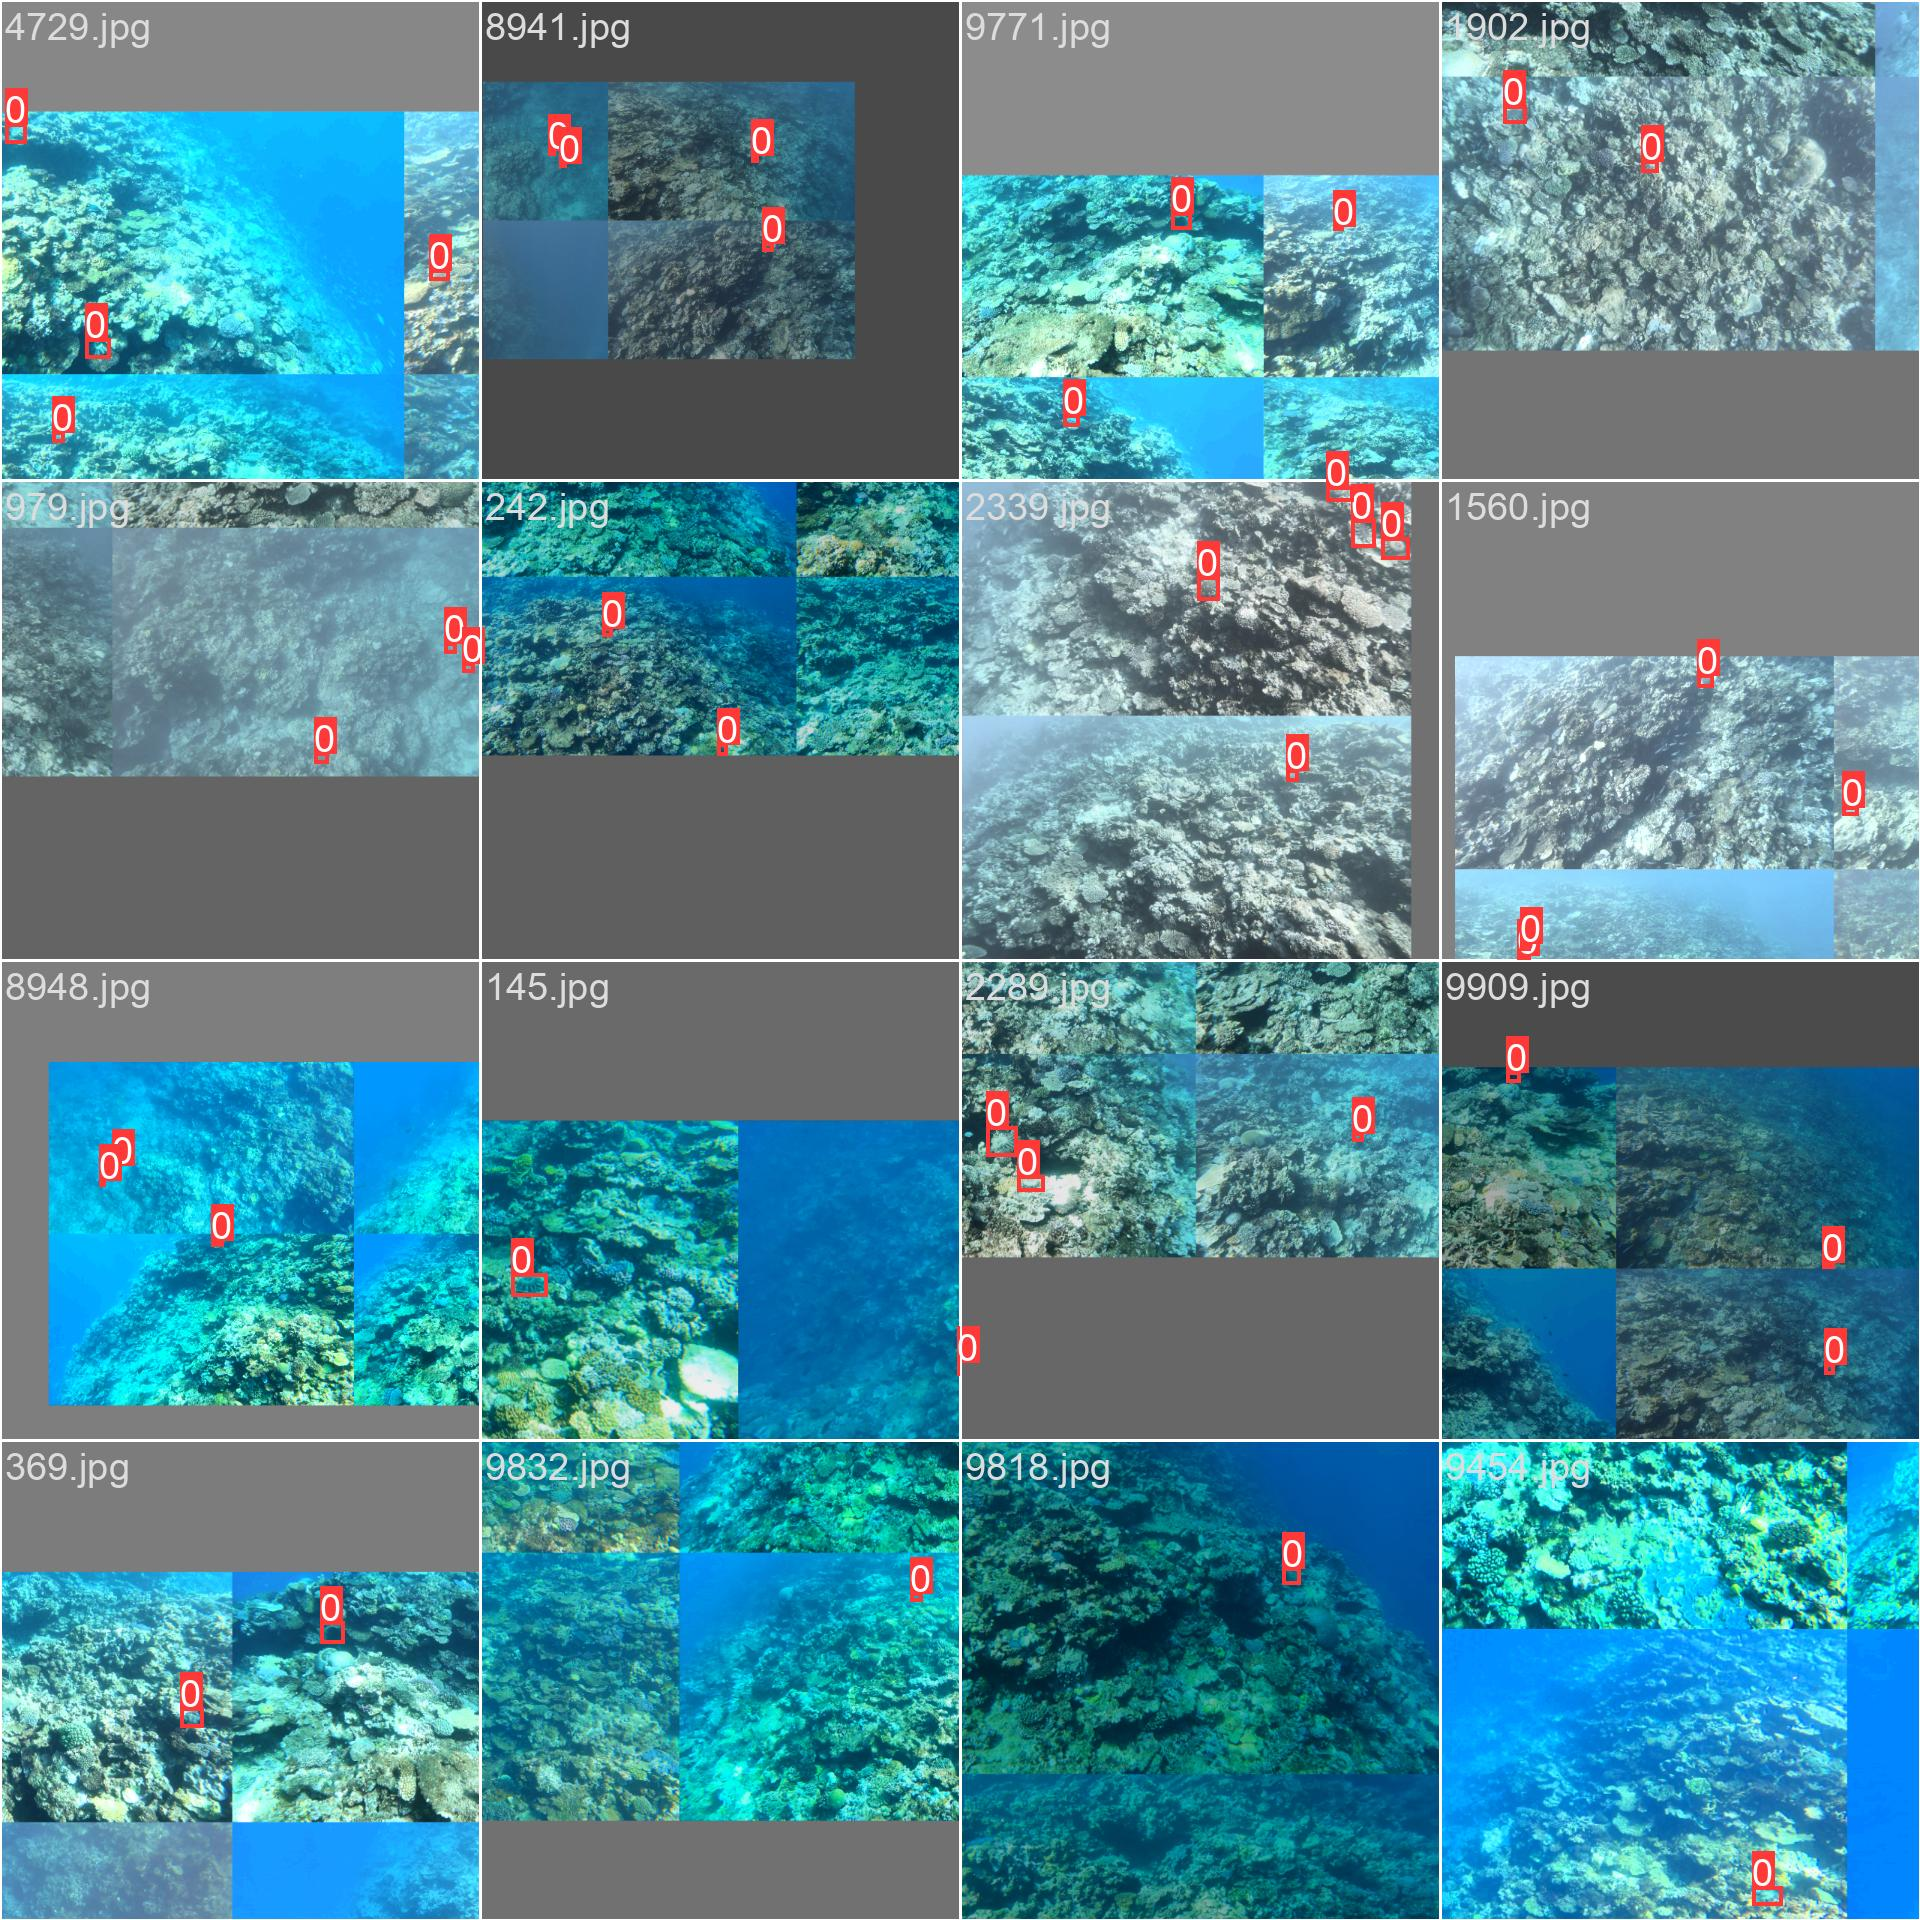

In [13]:
display(Image(filename="./runs/train/exp/train_batch0.jpg"))

### Train 1

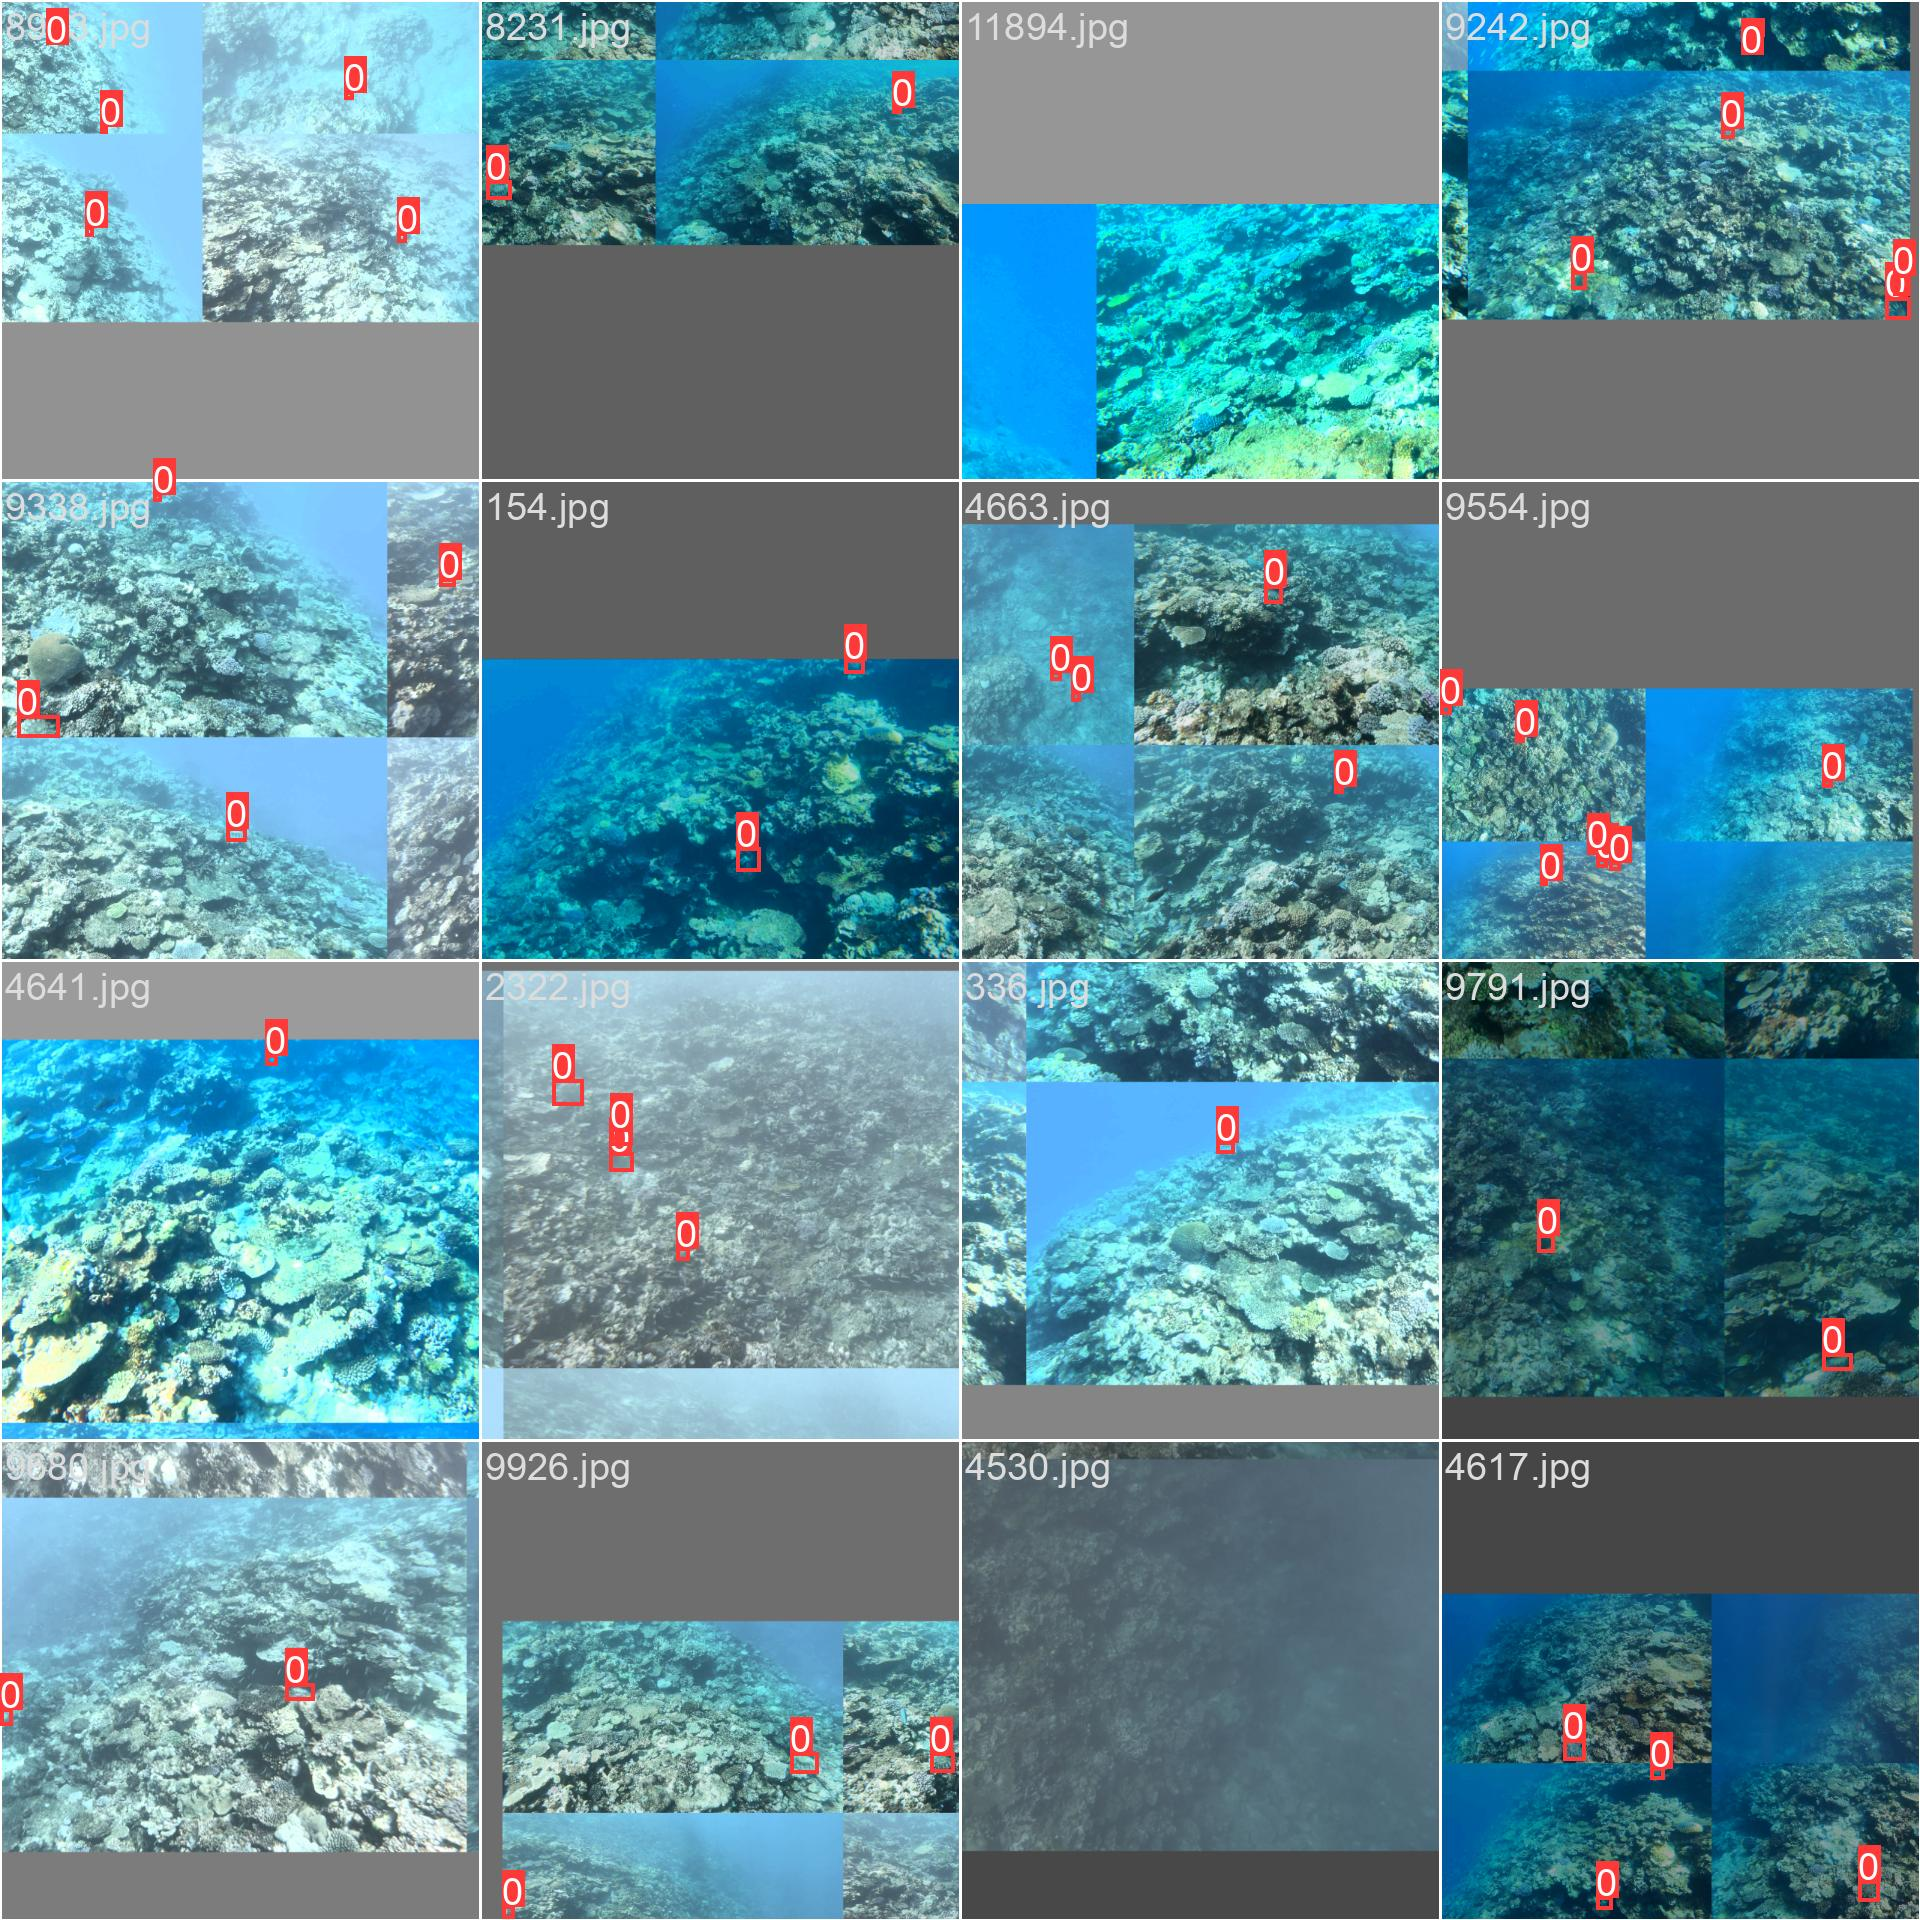

In [14]:
display(Image(filename="./runs/train/exp/train_batch1.jpg"))

### Val 0

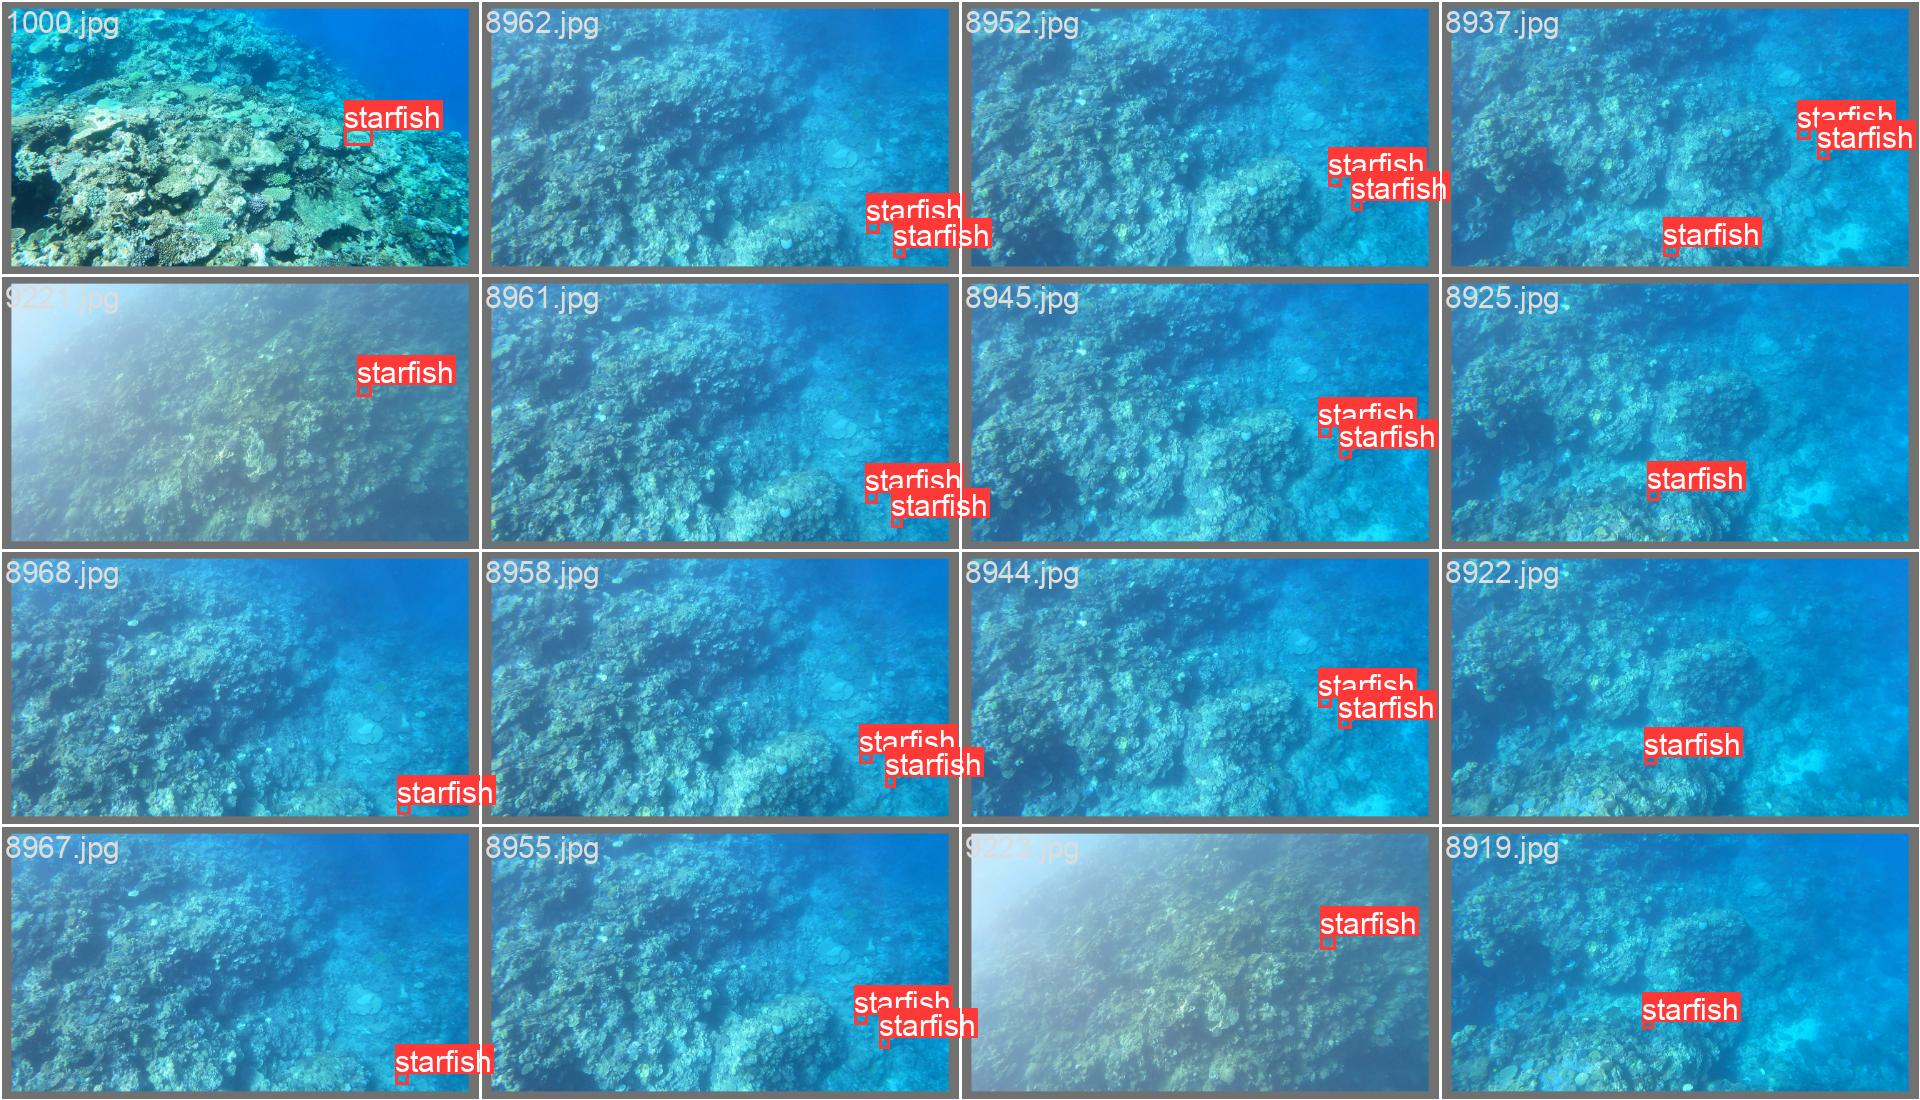

In [15]:
display(Image(filename="./runs/train/exp/val_batch0_labels.jpg"))

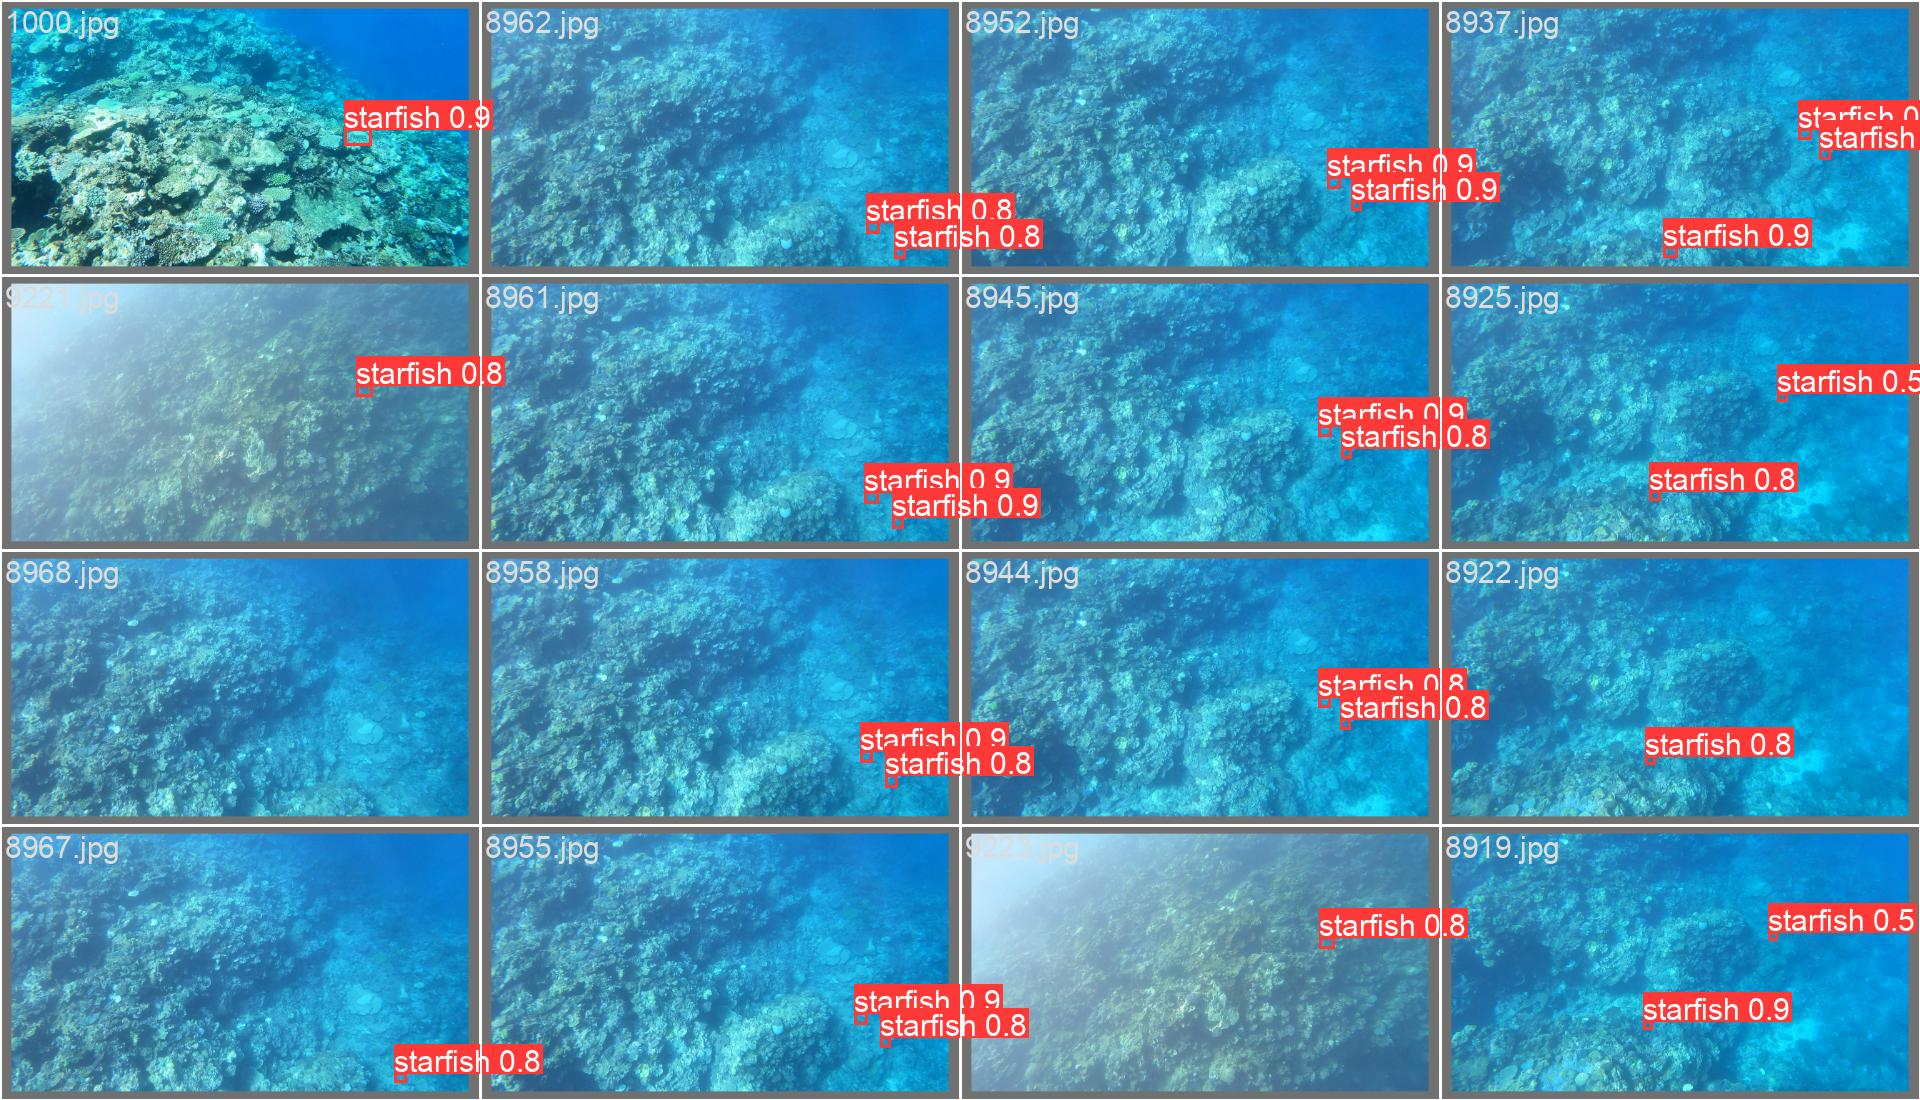

In [16]:
display(Image(filename="./runs/train/exp/val_batch0_pred.jpg"))

### Val 1

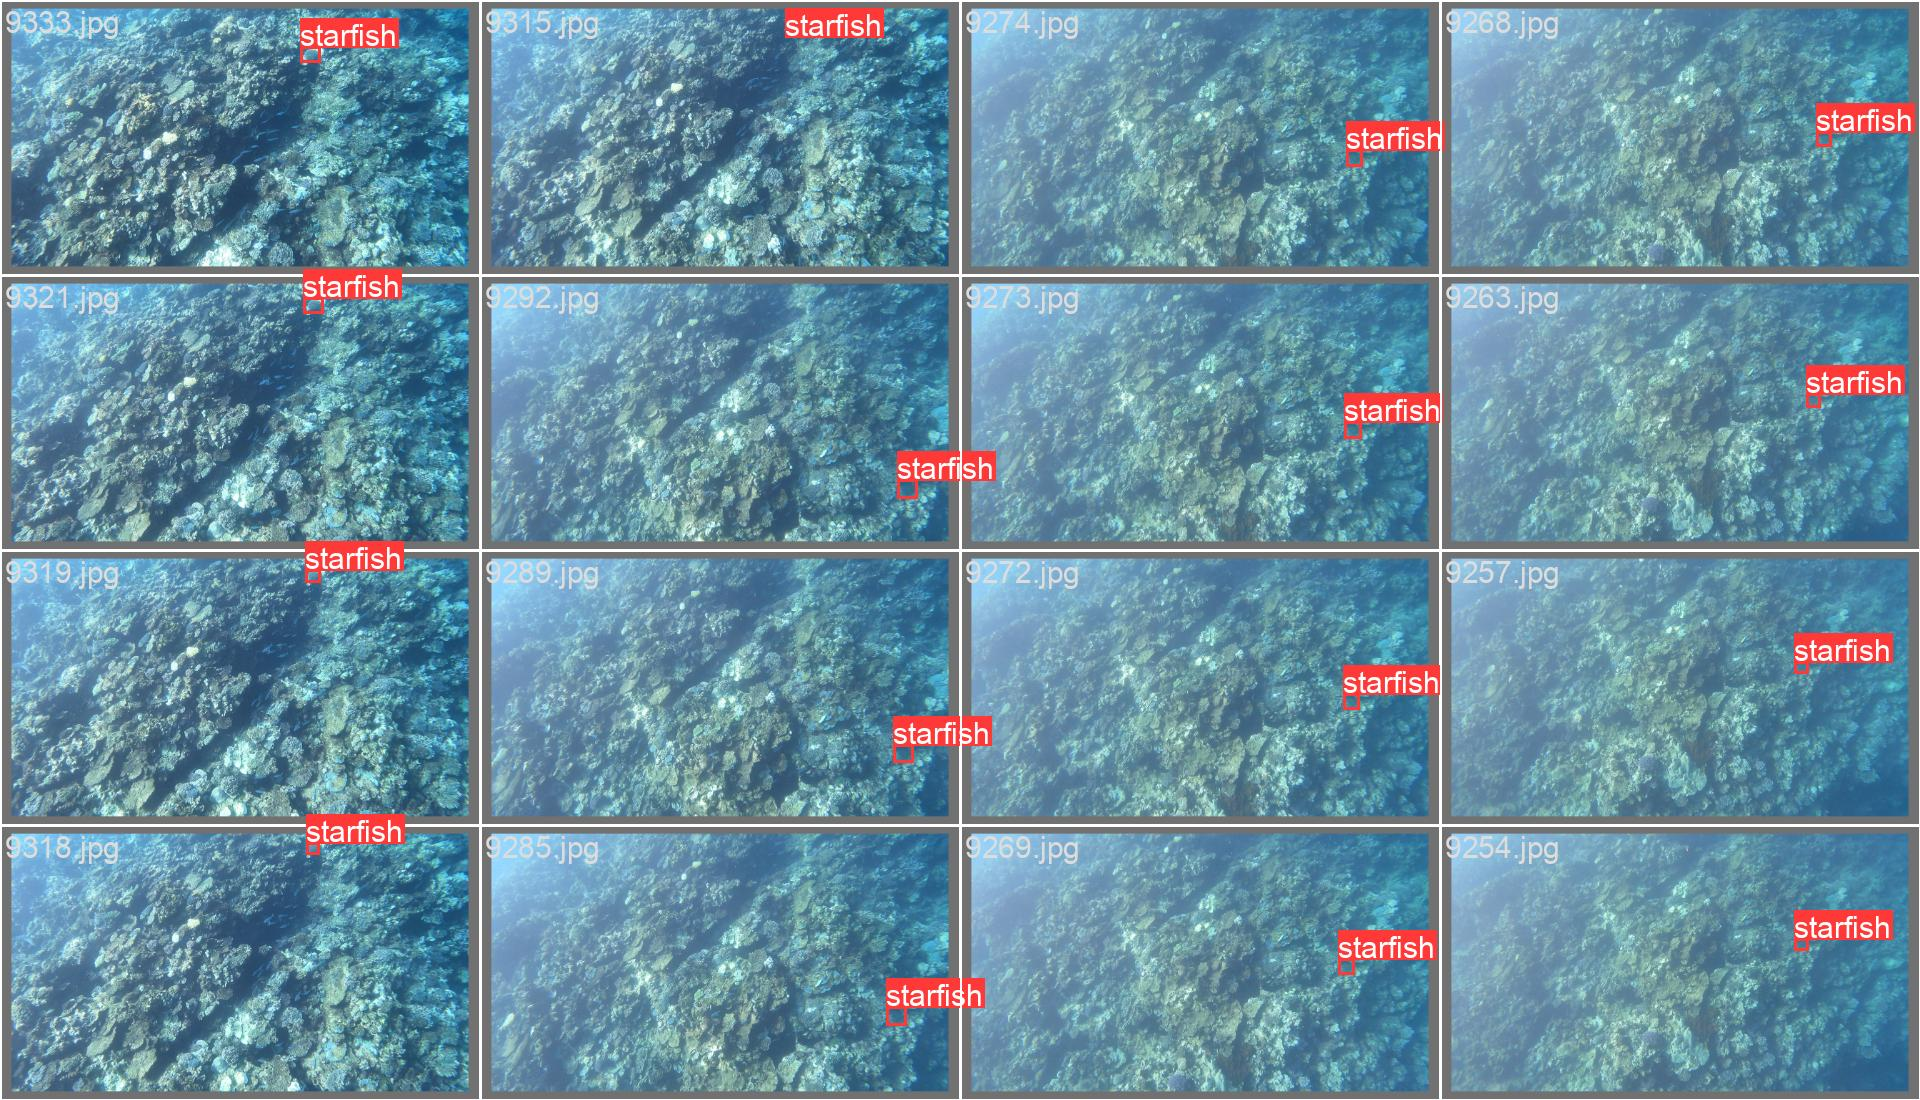

In [17]:
display(Image(filename="./runs/train/exp/val_batch1_labels.jpg"))

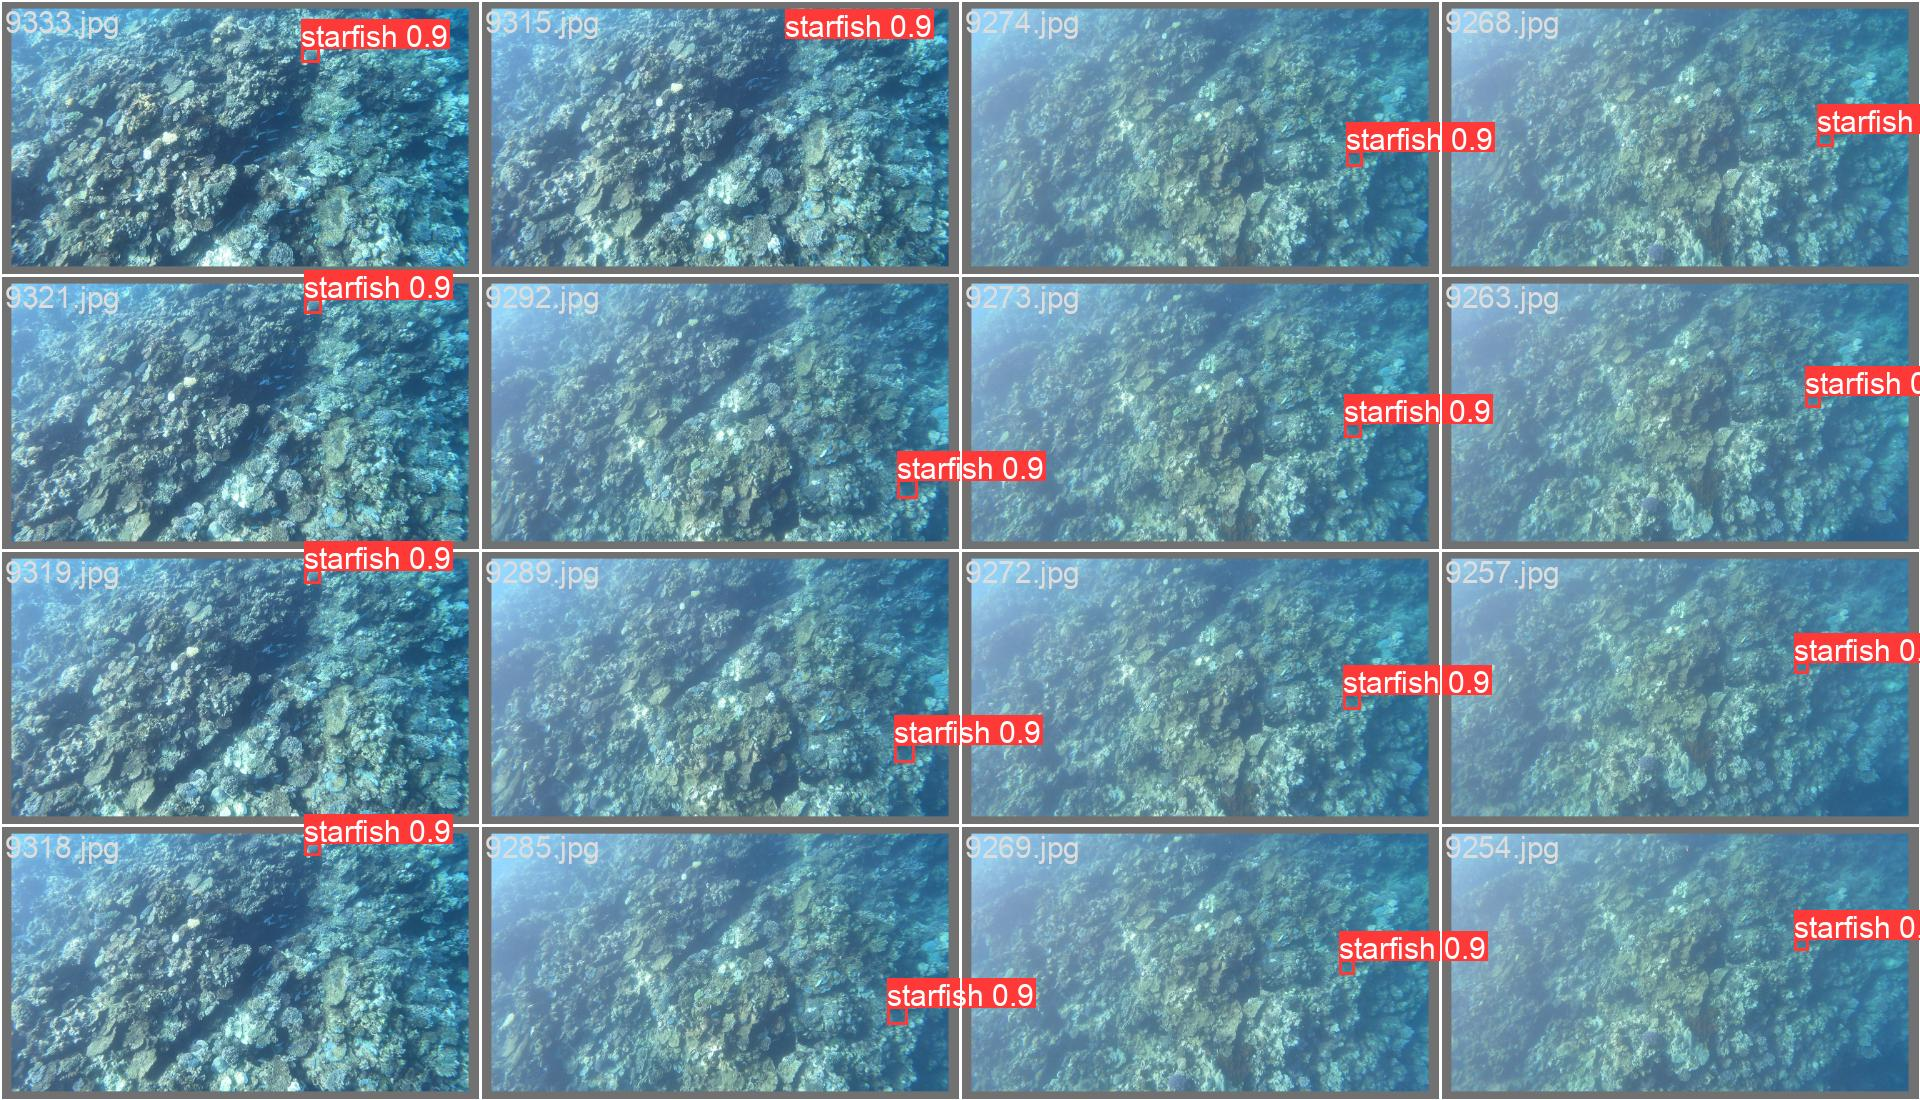

In [18]:
display(Image(filename="./runs/train/exp/val_batch1_pred.jpg"))